## 9.2 가우시안 혼합

- GMM(가우시안 혼합 모델)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 샘플마다 K개의 클러스터에서 랜덤하게 한 클러스터가 선택함. j번째 샘플을 위해 선택한 클러스터 인덱스는 zu로 표시함.

- z(i)=j이면, 즉 i번째 샘플이 j번째 클러스터에서 할당되었다면 이 샘플의 위치 x(i)는 평균이 μ(i)이고 공분산 ∑(i)인 가우시안 분포에서 랜덤하게 샘플됨. 이를 x(i)~N(μ(i), ∑(j))로 표현

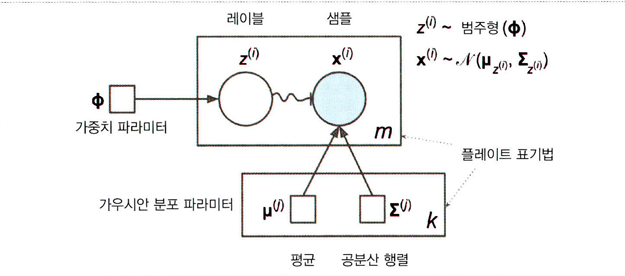

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

- 기댓값 최대화 알고리즘: 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복
  1. 샘플을 클러스터에 할당
  2. 클러스터를 업데이트
- (EM)은 클러스터 중심뿐만 아니라 크기, 모양, 방향과 클러스터의 상대적 가중치를 찾는 K-평균의 일반화로 생각할 수 있음.

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

5

In [ ]:
gm.predict(X)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [ ]:
gm.predict_proba(X)

array([[8.50418904e-06, 9.99991496e-01],
       [8.07573373e-01, 1.92426627e-01],
       [9.98062879e-01, 1.93712070e-03],
       ...,
       [9.99991246e-01, 8.75418221e-06],
       [9.99922557e-01, 7.74432322e-05],
       [9.99919105e-01, 8.08948529e-05]])

- 가우시안 혼합 모델은 생성 모델로 이 모델에서 새로운 샘플을 만들 수 있음.

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.18008552, -0.49986225],
       [ 1.05278999, -0.1767637 ],
       [ 1.89768692, -0.5362523 ],
       [ 0.96278298, -0.03399904],
       [ 0.20621967,  0.59082581],
       [ 0.43722819,  0.64596529]])

In [ ]:
y_new

array([0, 0, 0, 0, 1, 1])

- score_samples() 메서드를 이용해서 확률밀도함수의 로그를 예측 (점수가 높을수록 밀도가 높음)

In [ ]:
gm.score_samples(X)

array([-1.60381645, -1.97828643, -2.79080203, -1.78982239, -1.66417584,
       -1.36256074, -1.60498176, -1.86253282, -1.36672974, -1.54618528,
       -1.36163334, -1.36523795, -1.75013507, -1.81322987, -2.15857963,
       -1.5461211 , -1.63461118, -1.38701133, -1.9816992 , -2.91248487,
       -1.54029851, -2.38232523, -1.21219167, -1.46738876, -1.29684816,
       -1.53769692, -1.78297282, -1.43825969, -1.2181677 , -1.5669444 ,
       -1.54798004, -1.31190891, -2.1815191 , -1.36120247, -1.3136819 ,
       -1.55753146, -1.85625975, -1.68062072, -3.36502566, -1.90483965,
       -1.92312999, -3.31784924, -1.04230584, -1.23944441, -2.17970678,
       -1.34491425, -1.39477615, -2.11908357, -1.67469829, -2.4961136 ,
       -1.43426732, -2.29821795, -1.70224899, -2.11499703, -1.35348386,
       -1.39501868, -1.49845233, -2.07306785, -1.88496301, -1.79674418,
       -1.40886224, -1.97463406, -1.32796977, -1.55908967, -1.72287134,
       -2.34157082, -1.45335911, -1.27460733, -1.52328811, -1.41

- 평균, 결정 경계(파선), 밀도 등고선

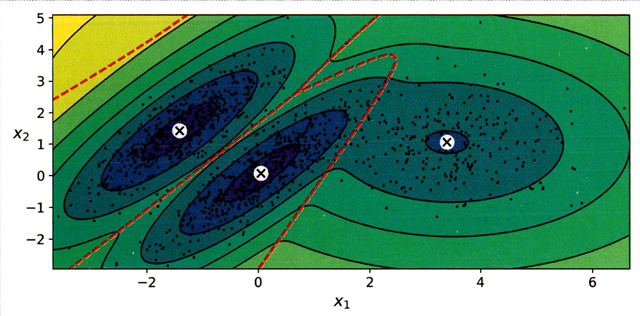

- 특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움
-> 여러움을 줄이려면 알고리즘이 학습할 파라미터의 개수를 제한

- convarianve_type 매개변수 값 설정
  - spherical: 모든 클러스터가 원형이나 지름은 다를 수 있음(분산이 다름)
  - diag: 클러스터는 크기에 상관없이 어떤 타원형도 가능하지만 타원의 축은 좌표축과 나란해야 함(공분산 행렬이 대각 행렬이어야 함.)
  - tied: 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐(즉 모든 클러스터는 동일한 공분산 행렬을 공유)




## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

- 이상치 탐지: 보통과 많이 다른 샘플을 감지하는 것으로 이상치라 브르며 샘플은 정상치라고 함.
- 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 간단함.
-> 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음

In [ ]:
import numpy as np
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalities = X[densities < density_threshold]

- 특이값 탐지: 이상치로 오염되지 않은 깨끗한 데이터셋에 훈련함.
- GaussianMixture 알고리즘은 클러스터의 개수를 지정해야 함.

## 9.2.2 클러스텅 개수 선택하기
- 이론적 정보 기준: AIC, BIC
- m은 샘플의 개수
- p는 모델이 학습할 파라미터 개수임.
- L은 모델의 가능도 함수의 최댓값임.

In [ ]:
gm.bic(X)

np.float64(3497.512204251755)

In [ ]:
gm.aic(X)

np.float64(3443.5268961829515)

## 9.2.3 베이즈 가우시안 혼합 모델
- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용 가능
- n_components를 최적의 클러스터 개수보다 크다고 믿을만한 값으로 지정

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.16, 0.1 , 0.13, 0.13, 0.11, 0.12, 0.  , 0.11, 0.14, 0.  ])

- 베타분포: 고정 범위 안에 높인 값을 가진 확률 변수를 모델링할 때 자중 사용 (범위: 0~1)
ex) SBP:가정하면 샘플의 30%가 클러스터 0에 할당되고 남은 샘플 60%가 클러스터 1에 할당 그 다음 남은 샘플의 50%가 클러스터 2에 할당

- 잠재 변수 z에 대한 사전 지식이 사전 확률이라는 확률분포 p(z)에 인코딩 될 수 있음
-> 클러스터가 적을 것이라는 사전믿음을 가질 수 있음. 이런 클러스터 개수에 대한 사전 믿음은 weight_concentration_prior 매개변수를 사용해 조정할 수 있음.


- 베이즈 정리: X가 주어졌을 때 z의 조건부 확률인 사후확률 분포를 계산
p(z|X) = 사후 확률 = (가능도 * 사전확률)/증거 = p(X|z)*p(z)/p(X)

- 변분 추론: 변분 파라미터를 가진 분포 패밀리를 선택하고 그 다음 q(z)가 p(z|X)의 좋은 근삿값이 되도록 파라미터를 최적화함.
- 이 식은 증거의 로그(logp(X))에서 증거 하한(ELBO)를 뺀 식으로 다시 쓸 수 있음.
- 증거의 로그는 q에 의존하지 않고 상수항으로 KL 발산을 최소화하려면 ELBO를 최대화 해야함.
- 블랙 박스 확률적 변분 추론: ELBO를 최대화하는 방법으로 각 반복에서 몇개의 샘플을 q에서 뽑아 변분 파라미터에 대한 ELBO의 그레이디언트를 추정하는데 사용
- 심층 신경망에 사용하는 베이즈 추론을 베이즈 딥러닝이라고 불림.

## 9.2.4  이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- PCA:inverse_transform() 메서드를 가진 다른 차원 축소 기법
- Fast-MCD:EllipticEnvelope 클래스에서 구현된 알고리즘은 이상치 감지에 유용
- 아이솔레이션 포레스트: 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘으로 무작위로 성장한 결정트리로 구성된 랜덤 포레스트를 만듦.
- LOF: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교, 이상치는 종종 k개의 최근접 이웃보다 더 격리됨.
- one-class SVM:모든 샘플을 고차원 공간에 매핑한 다음 이 고차원 공간에서 선형 SVM 분류기를 사용해 두 클래스를 분리함, 원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾는 것에 해당함.새로운 샘플이 이 영역에 높이지 않는다면 이는 이상치에 해당